-----

------

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.
La primera acción a realizar es llamar a la libreria de pandas para poder leer los archivos, en segundo lugar se deben leer los archivos uno por uno y revisarlos mediante info() para analizar el tipo de datos que contienen.

In [1]:
# importar librerías
import pandas as pd 

In [2]:
# leer conjuntos de datos en los DataFrames
df_instacart = pd.read_csv('/datasets/instacart_orders.csv', sep= ';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisle = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_orders = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print(df_instacart.info(), df_instacart.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None    order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 

In [4]:
# mostrar información del DataFrame
print(df_products.info(), df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None    product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             1

In [5]:
# mostrar información del DataFrame
print(df_aisle.info(), df_aisle.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None    aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
# mostrar información del DataFrame
print(df_departments.info(), df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None    department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
# mostrar información del DataFrame
print(df_orders.info(show_counts=True), df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None    order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
Al revisar los datos mediante info() se evidenció que los separadores de columnas eran ';', por lo que se modificó el código añadiendo sep= ';' para indicar que la separación de columnas ,además se observó que existen datos de tipo enteros, flotantes y objetos. Info() también mostró que hay sets de datos que contienen valores ausentes.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicadas
duplicates_instacart = df_instacart[df_instacart.duplicated(keep=False)]
print(duplicates_instacart)



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
Los duplicados tiene en común que corresponden al día miercoles en el horario de las 2 AM.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos = df_instacart[(df_instacart['order_dow'] == 3) & (df_instacart['order_hour_of_day'] == 2)]
print(pedidos)
print(pedidos.duplicated)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
El resultado sugiere que durante ese día y hora ocurrio un error el cual duplicó los pedidos de los usuarios o debido al error los usuarios replicaron el pedido y se le asigno el mismo número de orden.

In [10]:
# Elimina los pedidos duplicados
df_instacart = df_instacart.drop_duplicates(subset=['order_id'], keep='last')
df_instacart = df_instacart.reset_index(drop=True)


In [11]:
# Vuelve a verificar si hay filas duplicadas
print(df_instacart.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
478947    False
478948    False
478949    False
478950    False
478951    False
Length: 478952, dtype: bool


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_instacart[df_instacart.duplicated(subset=['order_id'], keep=False)])


Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos
Se evidenciaron filas duplicadas en la columna order_id asociadas a un días y hora específicos, lo cual sugiere un error que duplicó los pedidos, esto fue corregido con la función drop_duplicates aplicandola específicamente a la columna order id, al volver a llamar los duplicados se corroboró que estos fueron eliminados con éxito.  

### `products` data frame

In [13]:
# Verifica si hay duplicados
duplicates_2 = df_products[df_products.duplicated()]
print(duplicates_2)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de productos duplicados
print(df_products[df_products['product_id'].duplicated()])

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_2_upper = df_products['product_name'].str.upper()
duplicated_product = df_2_upper[df_2_upper.duplicated(keep=False)]
print(duplicated_product)

37                                                   NaN
41                                       BIOTIN 1000 MCG
71                                                   NaN
109                                                  NaN
185           FRESH SCENT DISHWASHER DETERGENT WITH DAWN
                              ...                       
49689                      HIGH PERFORMANCE ENERGY DRINK
49690                      ORIGINAL PANCAKE & WAFFLE MIX
49691    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                             SPRING WATER BODY WASH
49693                            BURRITO- STEAK & CHEESE
Name: product_name, Length: 1465, dtype: object


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicated_no_faltante = df_2_upper[(df_2_upper != 'NaN').duplicated().sum()]
print(duplicated_no_faltante)

df_products = df_products.drop_duplicates(subset=['product_name'])
df_products = df_products.reset_index(drop=True)
print(df_products.duplicated(subset=['product_name'], keep=False))

BURRITO- STEAK & CHEESE
0        False
1        False
2        False
3        False
4        False
         ...  
48432    False
48433    False
48434    False
48435    False
48436    False
Length: 48437, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se encontraron nombres de porductos faltantes duplicados ya que todos se les asigna el valor 'NaN', sin embargo también se encontraron productos duplicados, los cuales fueron eliminados mediante drop_duplicates, quedando el dataframe en optimas condiciones para su análisis.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print(df_departments[df_departments.duplicated()])

Empty DataFrame
Columns: [department_id, department]
Index: []


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_departments['department_id'][df_departments['department_id'].duplicated()])

Series([], Name: department_id, dtype: int64)


Describe brevemente tus hallazgos y lo que hiciste con ellos.
No se evidenciaron filas duplicadas y tampoco id de departamentos duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print(df_aisle[df_aisle.duplicated()])

Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_aisle['aisle_id'][df_aisle['aisle_id'].duplicated()])

Series([], Name: aisle_id, dtype: int64)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print(df_orders[df_orders.duplicated()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_orders['product_id'].duplicated(keep=False))

0          True
1          True
2          True
3          True
4          True
           ... 
4545002    True
4545003    True
4545004    True
4545005    True
4545006    True
Name: product_id, Length: 4545007, dtype: bool


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los id de productos pueden verse falsamente duplicados ya que estos pueden estar pedidos en más de una orden, además no se indentificaron filas completamente duplicadas.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
producto_ausente = (df_products[df_products['product_name'].isna()])
print(producto_ausente)

    product_id product_name  aisle_id  department_id
37          38          NaN       100             21


Describe brevemente cuáles son tus hallazgos.
Los valores ausentes se encuentran todos en las columnas de pasillo 100 y departamento 21

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
id_100 = producto_ausente[df_products['aisle_id'] == 100]
print(id_100.count())

product_id       1
product_name     0
aisle_id         1
department_id    1
dtype: int64


/tmp/ipykernel_1711/1870116704.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_100 = producto_ausente[df_products['aisle_id'] == 100]


Describe brevemente cuáles son tus hallazgos.
Se encontraron 1258 productos ausentes, todos asociados al pasillo id 100

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
id_21 = producto_ausente[df_products['department_id'] == 21]
print(id_21.count())

product_id       1
product_name     0
aisle_id         1
department_id    1
dtype: int64


/tmp/ipykernel_1711/2241842579.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  id_21 = producto_ausente[df_products['department_id'] == 21]


Describe brevemente cuáles son tus hallazgos.
Se encontró la misma cantidad de productos ausentes que en el pasillo id 100 para el departamento id 21, lo que sugiere la existencia de un problema con esta ubicación.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(df_aisle[df_aisle['aisle_id'] == 100])

print(df_departments[df_departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.
Tanto el pasillo como el departamento estan etiquetados como missing(perdido), por lo tanto esa es la razon de que los productos ausentes se encuentren asociados a esta localización.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los productos ausentes asociados en su totalidad a la ubicación de pasillo 100 departamento 21 fueron rellenados mediante la función fillna con la palabra 'Unknown'.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
print(df_instacart.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# No , todos corresponden a los días transcurridos desde el pedido anterior.

df_instacart['days_since_prior_order'].fillna(0, inplace=True)
print(df_instacart.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los valores ausentes es muy probable que se deban a que es el primer pedido asociado al ID del usuario, por lo tanto en el sistema no hay información sobre un pedido anterior,  lo más lógico sería reemplazar estos valores por cero.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
print(df_orders.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_orders['add_to_cart_order'].min(), df_orders['add_to_cart_order'].max())

1.0 64.0


Describe brevemente cuáles son tus hallazgos.
Los valores ausentes se encuentran asociados a la columna del  orden secuencial en el que se añadio un articulo al carro, el mínimo de productos agregados es 1 y el máximo 64. 
El valor máximo de 64 puede deberse a que ningún cliente ha hecho un pedido con una cantidad mayor de artículos.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
valores_ausentes = (df_orders[df_orders['add_to_cart_order'].isna()])
print(valores_ausentes)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
ausentes_productos = valores_ausentes.groupby('order_id')['product_id'].count()
print(ausentes_productos)
#No, hay todo tipo de valores.
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
id_pedido = df_orders.groupby('add_to_cart_order')['order_id']
print(id_pedido.head())
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
count_product = df_orders.groupby('order_id')['product_id'].count()
print(count_product)
print(count_product.min())

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64
0         2141543
1          567889
2         2261212
3          491251
4         2571142
           ...   
207998    2696359
213282    2470674
233518    1968313
235798    1603091
242797    1770056
Name: order_id, Length: 325, dtype: int64
order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64
1


Describe brevemente cuáles son tus hallazgos.
Se encontró que la cantidad de  productos que presentan valores ausentes no está asociados a que existan más de 64 productos en el carrito y que el número mínimo de id de producto en cada pedido es 1

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_orders['add_to_cart_order'].fillna('999', inplace=True)
df_orders['add_to_cart_order'].astype(int)
df_orders.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se logró reemplazar los valores ausentes de manera efectiva y además mediante 'astype', se cambio el tipo de dato a int para la columna add to cart order.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Los datos presentaron valores ausentes asociados a su ubicación pasillo - departamento, orden en el que se añadio al carro y días desde la última compra, todos estos fueron identificados  y reemplazados para mayor precisión de los cálculos, además se identificaron id de orden duplicados, los cuales estaban asociados a una hora y día determinados, siendo probablemente resultado de un error en el sistema, estos fueron eliminados conservando el último valor registrado asociado al ID de orden.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
# Columna order_hour_of_day
min_1 = 0
max_1 = 23

df_hour = (df_instacart['order_hour_of_day'] >= min_1) & (df_instacart['order_hour_of_day'] <= max_1)
print(df_hour)
print(df_hour.unique())

0         True
1         True
2         True
3         True
4         True
          ... 
478947    True
478948    True
478949    True
478950    True
478951    True
Name: order_hour_of_day, Length: 478952, dtype: bool
[ True]


In [36]:
#Columna order_dow
min_2 = 0
max_2 = 6

df_dow =(df_instacart['order_dow'] >= min_2) & (df_instacart['order_dow'] <= max_2)
print(df_dow)
print(df_dow.unique())

0         True
1         True
2         True
3         True
4         True
          ... 
478947    True
478948    True
478949    True
478950    True
478951    True
Name: order_dow, Length: 478952, dtype: bool
[ True]


Escribe aquí tus conclusiones
Los valores para la columna order_dow (día en que se hizo el pedido), fueron analizados asignando valores mínimos y máximos de 0 y 6 respectivamente representando los 7 días de la semana en los que se puede realizar el pedido, se evidenció que todos los valores son razonables, ya que al aplicar el filtro el único resultado obtenido es True que indica que cumple con ambas condiciones.
Los valores de la columna 'order_hour_of_day' se analizaron fijando un mínimo y máximo de 0 a 23 respectivamente los cuales identifican las 24 horas del día, de igual manera que en la columna anterior se obtuvo que todos los datos se encuentran dentro del rango al obtener True como único parámentro.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

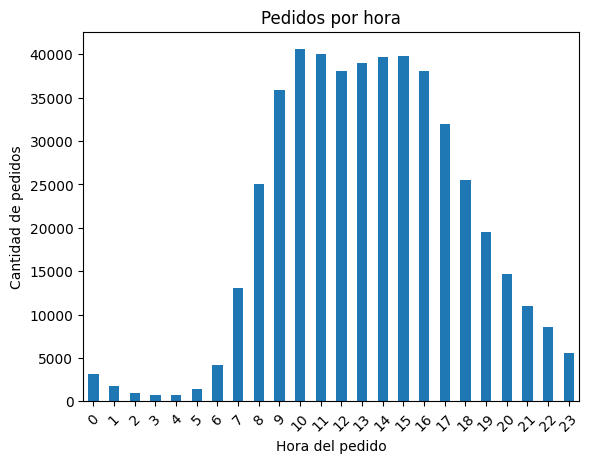

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
Ordenes_por_hora = df_instacart.groupby('order_hour_of_day')['order_id'].count().plot(xlabel='Hora del pedido', ylabel='Cantidad de pedidos', title='Pedidos por hora',kind='bar', rot=45)


Escribe aquí tus conclusiones
Se agruparon los datos en relación a la hora del día y la suma de ordenes realziadas, se utilizó un gráfico de barras ya que es un elemento que muestra de forma clara la variación en el tiempo y permite identificar la hora exacta en la que se produce el cambio en la tendencia de compras.
Respecto a los resultados obtenidos podemos concluir que la mayoria de las compras se realizan entre las 9:00 am y las 17:00 horas.

### [A3] ¿Qué día de la semana compran víveres las personas?

([<matplotlib.axis.XTick at 0x7fd67907fe20>,
 [Text(0, 0, 'Dom'),
  Text(1, 0, 'Lun'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Mier'),
  Text(4, 0, 'Jue'),
  Text(5, 0, 'Vie'),
  Text(6, 0, 'Sab')])

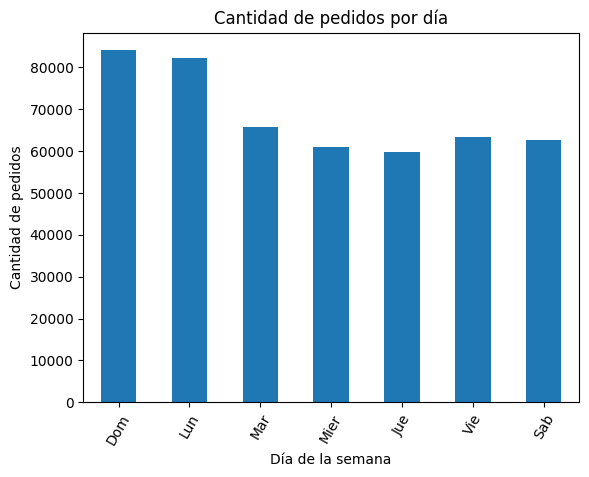

In [38]:
etiquetas_x = ['Dom', 'Lun', 'Mar', 'Mier', 'Jue', 'Vie', 'Sab']
ordenes_por_dia = df_instacart.groupby('order_dow')['order_id'].count().plot(xlabel='Día de la semana', ylabel='Cantidad de pedidos', kind='bar', title='Cantidad de pedidos por día', rot=60)
plt.xticks(np.arange(len(etiquetas_x)),etiquetas_x)

Escribe aquí tus conclusiones
Se agruparon los datos en relación a los días de la semana y el número total de ordenes realizadas, nuevamente se utilizó un gráfico de barras porque ejemplifica de manera clara la variación de los datos a través de los días, debido a que la columna order_dow se encontraba en codigo de números siendo el 0 = Domingo y así sucesivamente, se asignaron las etiquetas correspondientes a los dís de la semana en el eje X. De los resultados podemos concluir que los días favoritos de los clientes para realizar sus compras son los Domingos y Lunes, además el resto de la semana los pedidos se mantienen constantes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

2640
51337


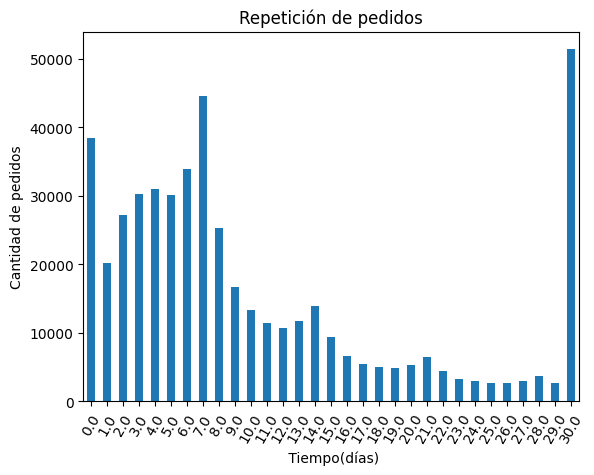

In [39]:
dias_entre_pedido = df_instacart.groupby('days_since_prior_order')['order_id'].count().plot(xlabel=' Tiempo(días)', ylabel='Cantidad de pedidos', title='Repetición de pedidos', xlim=[0,35], kind='bar', rot=60) 
min_pedidos = df_instacart.groupby('days_since_prior_order')['order_id'].count().min()
max_pedidos = df_instacart.groupby('days_since_prior_order')['order_id'].count().max()
print(min_pedidos)
print(max_pedidos)

Escribe aquí tus conclusiones
Los datos fueron agrupados en relación a la cantidad de pedidos y los días que tardan los clientes en hacer otro pedido.
Los resultados muestran que 51337 demoran 30 días en hacer otro pedido y 2640 demoran 25 día, por otro lado hay una cantidad bastante considerable que vuelve a realizar pedidos a los 7 días. Por lo tanto podemos decir de los hábitos de consumo de los usuarios que realizan compran semanales y mensuales.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

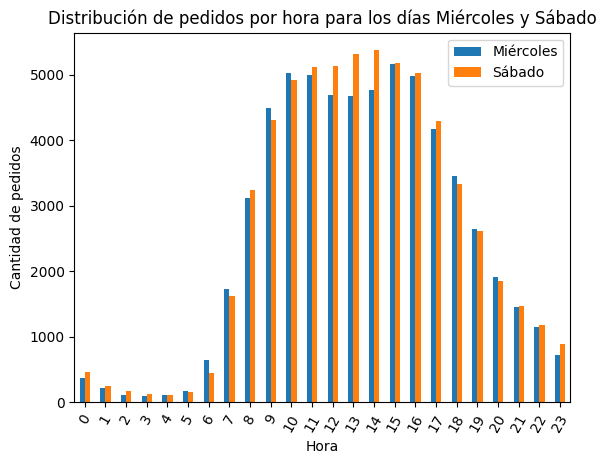

In [40]:
mie = df_instacart[df_instacart['order_dow'] == 3].groupby('order_hour_of_day')['order_id'].count()
sab = df_instacart[df_instacart['order_dow'] == 6].groupby('order_hour_of_day')['order_id'].count()
mie_and_sab = pd.merge(mie, sab, on= 'order_hour_of_day').plot(kind='bar', xlabel='Hora', ylabel= 'Cantidad de pedidos', rot=60, title='Distribución de pedidos por hora para los días Miércoles y Sábado' )
plt.legend(['Miércoles', 'Sábado'])

Escribe aquí tus conclusiones
La cantidad de pedidos realizados durante los días miércoles y sábados muestra que durante el período de más demanda de pedidos que abarca desde las 9:00 am a las 17:00 pm estos se concentran en el día sábado mayoritariamente, durante el resto del día muestran una distribución bastante similar.
Para el período de las 11:00 y las 15:00 de los días miércoles, la baja de pedidos puede deberse a que se trata de un día en horario laboral y los consumidores tiene menos tiempo para realizar sus pedidos.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

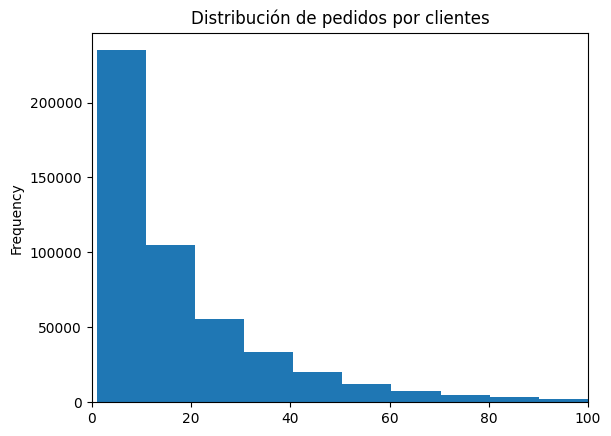

In [41]:
distribucion = df_instacart['order_number'].plot(kind='hist', xlabel='Número de pedidos', ylabel='Número de clientes', title='Distribución de pedidos por clientes', xlim=[0,100], bins=10)

Escribe aquí tus conclusiones
La mayoría de los clientes hacen pedidos con una frecuencia de 10 veces, y a medida que aumenta el número de ordenes por clientes la frecuencia va disminuyendo, esto quiere decir que los clientes utilizan la platafomra 1o veces y luego el número de pedidos cae drásticamente, lo cual puede deberse a que los clientes la dejan de usar. 

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
# números de productos por ID
df_products['total_pedidos'] = df_orders.groupby('product_id')['order_id'].count()
print(df_products.sort_values(by='total_pedidos', ascending=False).head(20))



 




       product_id                                       product_name  \
24852       25488               Sushi Chef Sampler Tra- Ready To Eat   
13176       13518                                 Dual Cup Dispenser   
21137       21678                               Fresh Chicken Thighs   
21903       22460               Decorating Cupcake Icing- Petal Pink   
47209       48434                      Strawberry Banana Super Drink   
47766       49010  Hearty & Delicious 100% Whole Wheat with Honey...   
47626       48869                            Barbecue Veggie Burgers   
16797       17234         Light & Fit Nonfat Yogurt Drink Strawberry   
26209       26878                G Series Lime Cucumber Sports Drink   
27845       28561                    Breaded Organic Chicken Nuggets   
27966       28684                             C & F Seasonal Support   
22935       23516               Organic Unbleached All-Purpose Flour   
24964       25602                      Blemish Control Apricot S

Escribe aquí tus conclusiones
Los productos más populares fueron obtenidos sumando el total de ordenes que contiene el id del producto y ordenados de forma descendente mediante sort_values aplicando el parámetro del total de pedidos asociados al producto.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [43]:
articulos_por_pedido = df_orders.groupby('order_id')['product_id'].count()
print(articulos_por_pedido.mean())

10.098983215049127


<AxesSubplot:title={'center':'Distribución de productos por pedido'}, ylabel='Frequency'>

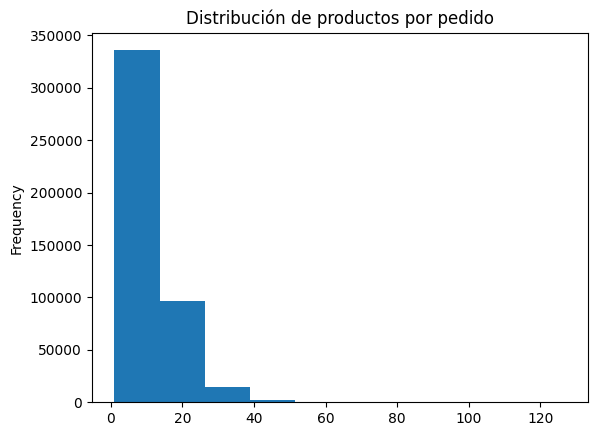

In [44]:
articulos_por_pedido.plot(kind='hist', title='Distribución de productos por pedido' )

Escribe aquí tus conclusiones
La media de productos por pedidos es de 10 y su distribución indica que la cantidad de pedidos va dismuyendo a medida que aumenta la cantidad de productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [45]:
reordered_products = df_orders[df_orders['reordered'] == 1]
reordered_products_names = df_products.merge(reordered_products, on= 'product_id')
reordered_products_names['total_pedidos_rep'] = reordered_products_names.groupby('order_id')['product_id'].count()
result = reordered_products_names.sort_values(by='total_pedidos_rep', ascending=False)
print(result.head(20))


         product_id                                product_name  aisle_id  \
1959075       36603          Lemon Lime Sparkling Seltzer Water       115   
936852        19208                Gluten Free Multigrain Bread       112   
1730767       31869                             Organic Edamame       116   
1832957       33978            Organic Icelandic Coconut Yogurt       120   
2479011       46787                     Fat Free Cottage Cheese       108   
1717990       31714                        Feta Cheese In Brine        21   
1648217       30391                            Organic Cucumber        83   
404157         8518                           Organic Red Onion        83   
903110        18594                     Emmentaler Swiss Slices        21   
1386261       26047                                  Tuna Salad         1   
1888628       35121      Lemon Ginger Sparkling Probiotic Drink        31   
844733        17652  Air Chilled Breaded Chicken Breast Nuggets       129   

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [46]:
#Proporcion de veces que se pide un producto
suma_total_pedidos = df_orders['order_id'].count()
pedidos_por_producto = df_orders.groupby('product_id')['order_id'].count()
proporcion_por_producto = pedidos_por_producto / suma_total_pedidos




1959075    9.900975e-06
936852     1.100108e-05
1730767    3.080303e-06
1832957    5.126505e-05
2479011    1.870184e-05
1717990    6.600650e-07
1648217    1.540152e-06
404157     2.640260e-06
903110     5.060498e-06
1386261    2.530249e-05
1888628    1.540152e-06
844733     4.400433e-07
1673227    2.200217e-06
871281     7.480737e-06
733526     4.488442e-05
1220886    1.100108e-06
1713430    1.320130e-06
1466613    1.364134e-05
83108      6.600650e-06
1308785    1.436741e-04
Name: total_pedidos, dtype: float64


<AxesSubplot:title={'center':'Repetición de pedidos por producto'}, ylabel='Frequency'>

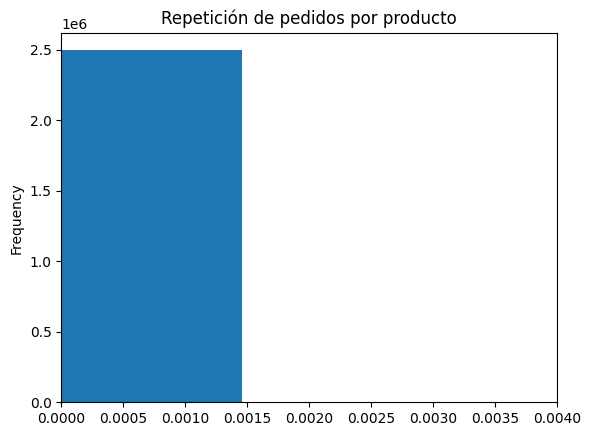

In [70]:
#Proporción de veces que se vuelve a pedir un producto
proporcion_reiterados = result['total_pedidos'] / suma_total_pedidos
print(proporcion_reiterados.head(20))
proporcion_reiterados.plot(kind='hist', xlim=[0, 0.004], title='Repetición de pedidos por producto')

In [53]:
id_3 = result.loc[:, 'product_id' : 'product_name']

tabla_proporciones = pd.concat([id_3, proporcion_reiterados], axis=1)
tabla_proporciones = tabla_proporciones.rename(columns={'total_pedidos': 'proporcion'})
print(tabla_proporciones.head(20))

         product_id                                product_name    proporcion
1959075       36603          Lemon Lime Sparkling Seltzer Water  9.900975e-06
936852        19208                Gluten Free Multigrain Bread  1.100108e-05
1730767       31869                             Organic Edamame  3.080303e-06
1832957       33978            Organic Icelandic Coconut Yogurt  5.126505e-05
2479011       46787                     Fat Free Cottage Cheese  1.870184e-05
1717990       31714                        Feta Cheese In Brine  6.600650e-07
1648217       30391                            Organic Cucumber  1.540152e-06
404157         8518                           Organic Red Onion  2.640260e-06
903110        18594                     Emmentaler Swiss Slices  5.060498e-06
1386261       26047                                  Tuna Salad  2.530249e-05
1888628       35121      Lemon Ginger Sparkling Probiotic Drink  1.540152e-06
844733        17652  Air Chilled Breaded Chicken Breast Nuggets 

Escribe aquí tus conclusiones
La proporciónde de productos que se vuelven a pedir se obtuvo filtrando los pedidos que en su columna reordered almacenaran el valor True. que significa que se ha vuelto a pedir el producto, luego se calculó el total de pedidos repetidos y se dividio por el total de pedidos obteniendose la proporcion de repetición. De los valores se observa que incluso los productos más populares poseen una baja proporción de repetición de pedido, lo cual puede deberse a la gran cantidad de productos y opciones disponibles en la tienda.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: product_id, Length: 149626, dtype: float64


<AxesSubplot:title={'center':'Productos reordenados por clientes'}, ylabel='Frequency'>

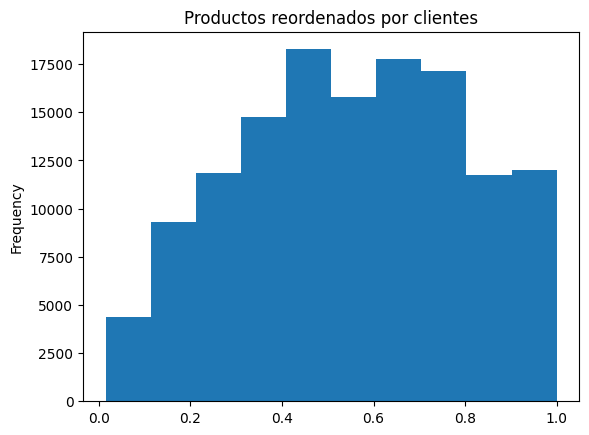

In [69]:


df_new = df_instacart.merge(df_orders, on='order_id')
df_new_reordered = (df_new[df_new['reordered'] == 1])
numero_productos_repetidos = df_new_reordered.groupby('user_id')['product_id'].count()
numero_total_productos_cliente = df_new.groupby('user_id')['product_id'].count()
proporcion_productos_pedidos = numero_productos_repetidos/numero_total_productos_cliente
print(proporcion_productos_pedidos)
proporcion_productos_pedidos.plot(kind='hist', title= 'Productos reordenados por clientes' )

Escribe aquí tus conclusiones
Para obtener la proporcion de repetición de pedido para cada cliente se obtuvieron todos los id de clientes que en la columna reordered almacenan true y luego se agrupo por la cantidad de productos que han repetidos y por el total de productos que han comprado. Los resultados evidencias que la proporción de repetición de compra por cliente es bastante alta llegando a valores mayores a 0,9 en algunos casos, sin embargo en promedio la gente repite sus pedidos en una proporción de 0,4 (o 40%).

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [68]:
primer_articulo = (df_new[df_new['add_to_cart_order'] == 1])
df_new['total_articulos'] = primer_articulo.groupby('product_id')['order_id'].count()
principales_articulos = primer_articulo.sort_values(by='total_articulos', ascending=False)
princilapes_articulos_2 = primer_articulo.merge(df_products, on='product_id')
print(principales_articulos_2.head(20))

       product_id add_to_cart_order  reordered  total_articulos  \
0           37655               1.0          1           2308.0   
1           44359               1.0          1           2024.0   
565         35821               1.0          0           1340.0   
574         32429               1.0          0           1246.0   
662         40454               1.0          1            997.0   
677         33198               1.0          1            795.0   
1852        24852               1.0          1            726.0   
17414       20042               1.0          1            474.0   
17423       12086               1.0          0            465.0   
17435       41588               1.0          0            447.0   
17545       30551               1.0          1            442.0   
17557       19309               1.0          1            431.0   
17566       46842               1.0          1            372.0   
17705       21137               1.0          1            365.

Escribe aquí tus conclusiones
Para obtener los artículos que son agregados en primer lugar al carro de compras se filtro la información desde la columna add_to_cart_order mediante el número 1 que representa el orden en el que se agregan, luego de filtados los resultados, se agruparon en relación a la cantidad de veces que se repite el id del producto en las ordenes de pedidos obteniendo el total de veces que se agrega en primer lugar(columna total de articulos).Se observa en los resultados que los primeros artículos en agregarse no son necesariamente los más populares ni los que más se vuelven a comprar.

### Conclusion general del proyecto:

In [ ]:
Los datos proporcionados evidenciaron que existian valores duplicados de id de pedidos para el día Miércoles a las 2:am,
estos fueron eliminados conservando el último valor registrado, además esto sugiere que en la fecha mencionada
se generó un problema en la plataforma, además se evidenciaron valores ausentes asociados al pasillo 100 del
departamento 21 los cuales figuraban como perdidos, por lo cual fueron etiquetados como desconocidos, esto pudo 
deberse a una falla de inventario de dicho pasillo.
En cuento al comportamiento de compra de los clientes podemos concluir una gran cantidad de los pedidos se realizan
los días Domingo y Lunes, y durante el resto de la semana muestran  una  distribución contsante entre ellos. Por otro 
lado podemos decir que el horario de mayor demanda de pedidos abarca desde las 9:00 am hasta las 17:00 pm, cayendo la
cantidad de pedidos de manera consireable en el resto de los horario, y en relación a la cantidad de días entre pedidos
podemos concluir que la mayoría de los clientes vuelve a repetir un pedido entre 7 y 30 días por lo que el comportamiento de
compra suele ser de pedidos semasnales y mensuales.
En relacion a la cantidad de productos que se solictan por pedido se concluye que tienen una media de 10 elementos
por cada id de orden y la cantidad de pedidos disminuye a medida que aumenta la cantidad de pedidos. También se evidenciaron
que los productos más populares(los más vendidos) no coiciden en su totalidad con los productos que más se vuelven a
pedir por los clientes, y además  a la hora de revisar cuales son los artículos que primero se agregan al carro estos no 
suelen tratarse de los más populares.
Por último en cuanto a la fidelización de los clientes por la plataforma podemos evidenciar que la mayoria de suele realizar
10 pedidos y luego el número cae drásticamente, lo cual podría sugerir que se pierde el interés por usar la
platafomra ya sea por falta de productos nuevos o falta de los más solicitados.